In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ijson

In [2]:
card = pd.read_csv("cards_data.csv")
transaction = pd.read_csv("transactions_data.csv")
user = pd.read_csv("users_data.csv")

# Dataset setting according to user intersection

In [3]:
card = card.sort_values(by="client_id", ascending=True)
trnasaction = transaction.sort_values(by="client_id", ascending=True)
user = user.sort_values(by="id", ascending=True)

In [4]:
card_id = card["client_id"].unique()
trans_id = transaction["client_id"].unique()
user_id = user["id"].unique()

In [5]:
common = set(card_id) & set(trans_id) & set(user_id)
print("len of common: ", len(common))
print("unique of common:", common)

len of common:  1219
unique of common: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(11), np.int64(13), np.int64(14), np.int64(16), np.int64(17), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(24), np.int64(27), np.int64(28), np.int64(32), np.int64(33), np.int64(34), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(42), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(55), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(68), np.int64(69), np.int64(73), np.int64(74), np.int64(75), np.int64(77), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(84), np.int64(86), np.int64(87), np.int64(89), np.int64(90), np.int64(92), np.int64(94), np.int64(96), np.int64(98), np.int64(100), np.int64(103), np.int64(104), np.int64(106), np.int64(1

client number = 1219

In [6]:
card_common = card[card["client_id"].isin(common)]
trans_common = transaction[transaction["client_id"].isin(common)]
user_common = user[user["id"].isin(common)]
print("nunique check:", card_common["client_id"].nunique(), trans_common["client_id"].nunique(), user_common["id"].nunique())
print("card shape:", card_common.shape)
print("trans shape:", trans_common.shape)
print("user shape:", user_common.shape)

nunique check: 1219 1219 1219
card shape: (4514, 13)
trans shape: (13305915, 12)
user shape: (1219, 14)


# Distribution Check

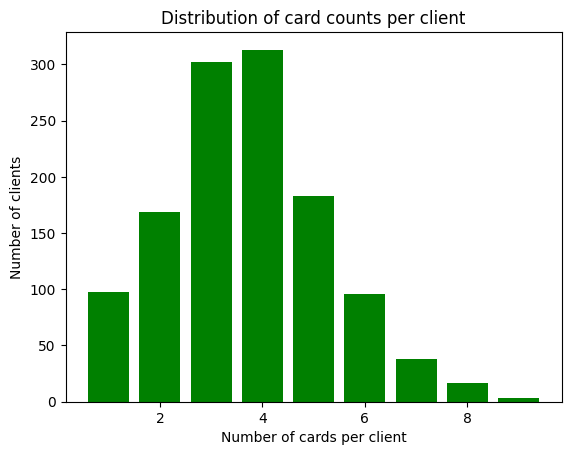

count    1219.000000
mean        3.703035
std         1.571633
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: count, dtype: float64


In [7]:
client_card_counts = card_common["client_id"].value_counts()
card_count = client_card_counts.unique()
card_count_dist = client_card_counts.value_counts().sort_index()

plt.figure()
plt.bar(card_count_dist.index, card_count_dist.values, color="green")
plt.xlabel("Number of cards per client")
plt.ylabel("Number of clients")
plt.title("Distribution of card counts per client")
plt.show()
print(client_card_counts.describe())

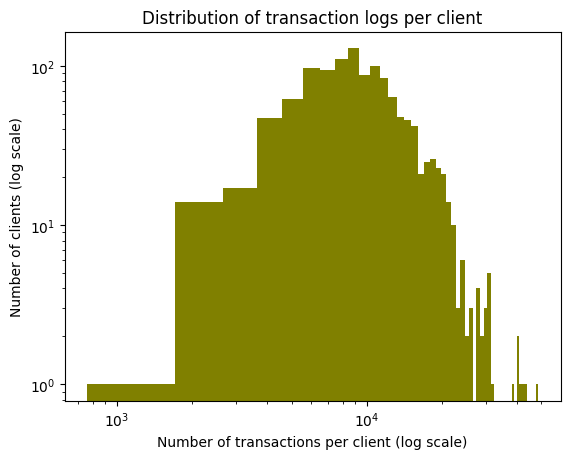

count     1219.000000
mean     10915.434783
std       5607.355367
min        760.000000
25%       7223.500000
50%       9832.000000
75%      13349.000000
max      48479.000000
Name: count, dtype: float64


In [8]:
trans_trans_counts = trans_common["client_id"].value_counts()
trans_count = trans_trans_counts.nunique()
trans_count_dist = trans_trans_counts.value_counts().sort_index()

plt.figure()
plt.hist(trans_trans_counts, bins=50, color="olive")
plt.xscale("log")
plt.yscale("log")  
plt.xlabel("Number of transactions per client (log scale)")
plt.ylabel("Number of clients (log scale)")
plt.title("Distribution of transaction logs per client")
plt.show()
print(trans_trans_counts.describe())

# Dataset for Modeling 

In [9]:
ids = []
labels = []

with open("train_fraud_labels.json", "rb") as f:
    for k, v in ijson.kvitems(f, "target"):
        kid = int(str(k).strip())
        ids.append(kid)
        labels.append(1 if v == "Yes" else 0)

labels_df = pd.DataFrame({"id": ids, "fraud": labels}).astype({"fraud": "int8"})


In [10]:
labels_df

,id,fraud
0,10649266,0
1,23410063,0
2,9316588,0
3,12478022,0
4,9558530,0
...,...,...
8914958,14064699,0
8914959,7676538,0
8914960,15131030,0
8914961,17244732,0


In [11]:
final_df = trans_common.merge(labels_df, on="id", how="inner")
final_df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,fraud
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,0
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,0
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,0
3,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,0
4,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914958,23761862,2019-10-31 23:54:00,672,5001,$12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,NaN,0
8914959,23761863,2019-10-31 23:54:00,1384,3723,$67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,NaN,0
8914960,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN,0
8914961,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN,0


In [12]:
print("final_df rows (intersection):", final_df.shape[0])
print(final_df["fraud"].value_counts())

final_df rows (intersection): 8914963
fraud
0    8901631
1      13332
Name: count, dtype: int64


In [13]:
final_df.to_csv("final_df.csv")

In [14]:
df = pd.read_csv("final_df.csv")
df.head()

,Unnamed: 0,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,fraud
0,0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,0
1,1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,0
2,2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,0
3,3,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,0
4,4,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,NaN,0


In [18]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'client_id', 'card_id', 'amount',
       'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip',
       'mcc', 'errors', 'fraud'],
      dtype='object')

In [20]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,fraud
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,0
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,0
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,0
3,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,0
4,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,NaN,0


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df["amount"] = (df["amount"].str.replace("$", "", regex=False).astype("float32"))

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,fraud
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,0
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,0
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,0
3,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,0
4,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914958,23761862,2019-10-31 23:54:00,672,5001,$12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,NaN,0
8914959,23761863,2019-10-31 23:54:00,1384,3723,$67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,NaN,0
8914960,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN,0
8914961,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN,0


In [25]:
df["id"].duplicated().sum()

np.int64(0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          object        
 5   use_chip        object        
 6   merchant_id     int64         
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             float64       
 10  mcc             int64         
 11  errors          object        
 12  fraud           int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 884.2+ MB


In [31]:
df.isnull().sum()

id                      0
date                    0
client_id               0
card_id                 0
amount                  0
use_chip                0
merchant_id             0
merchant_city           0
merchant_state    1047865
zip               1107377
mcc                     0
errors            8773196
fraud                   0
dtype: int64

In [28]:
df["errors"].value_counts()

errors
Insufficient Balance                                   87686
Bad PIN                                                21488
Technical Glitch                                       17776
Bad Card Number                                         5235
Bad CVV                                                 4091
Bad Expiration                                          4086
Bad Zipcode                                              767
Bad PIN,Insufficient Balance                             198
Insufficient Balance,Technical Glitch                    163
Bad Card Number,Insufficient Balance                      50
Bad PIN,Technical Glitch                                  44
Bad CVV,Insufficient Balance                              40
Bad Expiration,Insufficient Balance                       34
Bad Card Number,Bad Expiration                            28
Bad Card Number,Bad CVV                                   26
Bad Expiration,Bad CVV                                    21
Bad Expiration,Te

In [33]:
errors_type = df["errors"].unique()
errors_type

array([nan, 'Bad Expiration', 'Bad Card Number', 'Insufficient Balance',
       'Bad PIN', 'Technical Glitch', 'Bad CVV',
       'Insufficient Balance,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad Zipcode',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration', 'Bad PIN,Technical Glitch',
       'Bad Card Number,Insufficient Balance',
       'Bad Expiration,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Technical Glitch', 'Bad CVV,Insufficient Balance',
       'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance',
       'Bad Card Number,Bad Expiration,Insufficient Balance',
       'Bad Expiration,Bad CVV', 'Bad Zipcode,Technical Glitch'],
      dtype=object)

In [34]:
unique_errors = (
    pd.Series(errors_type)
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
    .unique()
)
print(unique_errors)

['Bad Expiration' 'Bad Card Number' 'Insufficient Balance' 'Bad PIN'
 'Technical Glitch' 'Bad CVV' 'Bad Zipcode']


In [35]:
err = df["errors"]

# 에러 존재 여부 (baseline feature)
df["has_error"] = err.notna().astype("int8")

# 1. Card Credential Errors
df["err_card_credential"] = err.str.contains(
    "Bad Card Number|Bad Expiration|Bad CVV",
    na=False
).astype("int8")

# 2. Authentication Errors
df["err_authentication"] = err.str.contains(
    "Bad PIN|Bad Zipcode",
    na=False
).astype("int8")

# 3. Financial Constraint Errors
df["err_financial"] = err.str.contains(
    "Insufficient Balance",
    na=False
).astype("int8")

# 4. System Errors
df["err_system"] = err.str.contains(
    "Technical Glitch",
    na=False
).astype("int8")

In [37]:
bad_rows = df[(df["errors"].notna()) & (df["has_error"] == 0)]
len(bad_rows)

0

In [38]:
errors_raw = df["errors"].copy()

In [39]:
df = df.drop(columns=["errors"])

In [40]:
df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,fraud,has_error,err_card_credential,err_authentication,err_financial,err_system
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,0,0,0,0,0,0
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,0,0,0,0,0,0
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,0,0,0,0,0,0
3,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,0,0,0,0,0,0
4,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914958,23761862,2019-10-31 23:54:00,672,5001,$12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,0,0,0,0,0,0
8914959,23761863,2019-10-31 23:54:00,1384,3723,$67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,0,0,0,0,0,0
8914960,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,0,0,0,0,0,0
8914961,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,0,0,0,0,0,0


In [42]:
df.isnull().sum()

id                           0
date                         0
client_id                    0
card_id                      0
amount                       0
use_chip                     0
merchant_id                  0
merchant_city                0
merchant_state         1047865
zip                    1107377
mcc                          0
fraud                        0
has_error                    0
err_card_credential          0
err_authentication           0
err_financial                0
err_system                   0
dtype: int64

온라인 거래로 해석되는 결측은 살리고,\
오프라인인데 주소가 없는 건 삭제(또는 별도 처리)

In [43]:
df["use_chip"].unique()

array(['Swipe Transaction', 'Online Transaction', 'Chip Transaction'],
      dtype=object)

In [46]:
df["is_online"] = (df["use_chip"] == "Online Transaction").astype("int8")
df["offline_addr_missing"] = (
    (df["is_online"] == 0) &
    (df["merchant_state"].isna() | df["zip"].isna())
).astype("int8")

In [ ]:
df["offline_addr_missing"].value_counts()

offline_addr_missing
0    8851561
1      63402
Name: count, dtype: int64

In [49]:
df.groupby("offline_addr_missing")["fraud"].mean()

offline_addr_missing
0    0.001131
1    0.052349
Name: fraud, dtype: float64

In [51]:
df = df[df["offline_addr_missing"] == 0].copy()

In [52]:
df.shape

(8851561, 20)

In [58]:
df.isnull().sum()

id                            0
date                          0
client_id                     0
card_id                       0
amount                        0
use_chip                      0
merchant_id                   0
merchant_city                 0
merchant_state          1043975
zip                     1043975
mcc                           0
fraud                         0
has_error                     0
err_card_credential           0
err_authentication            0
err_financial                 0
err_system                    0
is_online                     0
offline_addr_missing          0
dtype: int64

In [60]:
df["merchant_state"] = df["merchant_state"].fillna("ONLINE")
df["zip"] = df["zip"].fillna("ONLINE").astype(str)
df.isna().sum()

id                      0
date                    0
client_id               0
card_id                 0
amount                  0
use_chip                0
merchant_id             0
merchant_city           0
merchant_state          0
zip                     0
mcc                     0
fraud                   0
has_error               0
err_card_credential     0
err_authentication      0
err_financial           0
err_system              0
is_online               0
offline_addr_missing    0
dtype: int64

In [61]:
df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,fraud,has_error,err_card_credential,err_authentication,err_financial,err_system,is_online,offline_addr_missing
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,0,0,0,0,0,0,0,0
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,0,0,0,0,0,0,0,0
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,0,0,0,0,0,0,0,0
3,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,0,0,0,0,0,0,0,0
4,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914958,23761862,2019-10-31 23:54:00,672,5001,$12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,0,0,0,0,0,0,0,0
8914959,23761863,2019-10-31 23:54:00,1384,3723,$67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,0,0,0,0,0,0,0,0
8914960,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,0,0,0,0,0,0,0,0
8914961,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,ONLINE,ONLINE,5815,0,0,0,0,0,0,1,0


In [62]:
df = df.drop(columns=["id", "offline_addr_missing", "is_online"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8851561 entries, 0 to 8914962
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   client_id            int64         
 2   card_id              int64         
 3   amount               object        
 4   use_chip             object        
 5   merchant_id          int64         
 6   merchant_city        object        
 7   merchant_state       object        
 8   zip                  object        
 9   mcc                  int64         
 10  fraud                int64         
 11  has_error            int8          
 12  err_card_credential  int8          
 13  err_authentication   int8          
 14  err_financial        int8          
 15  err_system           int8          
dtypes: datetime64[ns](1), int64(5), int8(5), object(5)
memory usage: 852.6+ MB


In [64]:
df["amount"] = (
    df["amount"]
    .str.replace("$", "", regex=False)
    .astype("float32")
)

In [ ]:
# memory 줄이기 
df["client_id"] = df["client_id"].astype("int32")
df["card_id"] = df["card_id"].astype("int32")
df["merchant_id"] = df["merchant_id"].astype("int32")
df["mcc"] = df["mcc"].astype("int16")

In [65]:
cat_cols = [
    "use_chip",
    "merchant_city",
    "merchant_state",
    "zip"
]

for c in cat_cols:
    df[c] = df[c].astype("category")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8851561 entries, 0 to 8914962
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   client_id            int32         
 2   card_id              int32         
 3   amount               float32       
 4   use_chip             category      
 5   merchant_id          int32         
 6   merchant_city        category      
 7   merchant_state       category      
 8   zip                  category      
 9   mcc                  int16         
 10  fraud                int64         
 11  has_error            int8          
 12  err_card_credential  int8          
 13  err_authentication   int8          
 14  err_financial        int8          
 15  err_system           int8          
dtypes: category(4), datetime64[ns](1), float32(1), int16(1), int32(3), int64(1), int8(5)
memory usage: 448.4 MB


In [67]:
df.to_csv(
    "transactions_clean.csv",
    index=False
)

In [69]:
df.shape

(8851561, 16)

In [ ]:
df.to_parquet("transactions_clean.parquet", index=False)

In [3]:
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable


In [4]:
df = pd.read_parquet("transactions_clean.parquet")

In [5]:
df

,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,fraud,has_error,err_card_credential,err_authentication,err_financial,err_system
0,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,0,0,0,0,0,0
1,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,0,0,0,0,0,0
2,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,0,0,0,0,0,0
3,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,0,0,0,0,0,0
4,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851556,2019-10-31 23:54:00,672,5001,12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,0,0,0,0,0,0
8851557,2019-10-31 23:54:00,1384,3723,67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,0,0,0,0,0,0
8851558,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,0,0,0,0,0,0
8851559,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,ONLINE,ONLINE,5815,0,0,0,0,0,0


In [8]:
df["date"] = pd.to_datetime(df["date"])

df["client_id"] = df["client_id"].astype("int32")
df["card_id"] = df["card_id"].astype("int32")
df["merchant_id"] = df["merchant_id"].astype("int32")
df["mcc"] = df["mcc"].astype("int16")

df["amount"] = df["amount"].astype("float32")

for c in ["use_chip", "merchant_city", "merchant_state", "zip"]:
    df[c] = df[c].astype("category")

for c in [
    "has_error",
    "err_card_credential",
    "err_authentication",
    "err_financial",
    "err_system"
]:
    df[c] = df[c].astype("int8")

df["fraud"] = df["fraud"].astype("int8")

In [9]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8851561 entries, 0 to 8851560
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   client_id            int32         
 2   card_id              int32         
 3   amount               float32       
 4   use_chip             category      
 5   merchant_id          int32         
 6   merchant_city        category      
 7   merchant_state       category      
 8   zip                  category      
 9   mcc                  int16         
 10  fraud                int8          
 11  has_error            int8          
 12  err_card_credential  int8          
 13  err_authentication   int8          
 14  err_financial        int8          
 15  err_system           int8          
dtypes: category(4), datetime64[ns](1), float32(1), int16(1), int32(3), int8(6)
memory usage: 323.8 MB
